In [1]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import backend as K
print(K.epsilon())

2.2.0-rc3
1e-07


In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [23]:
import pydot
import graphviz

In [3]:
# load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [5]:
# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels: ", dict(zip(unique, counts)))
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


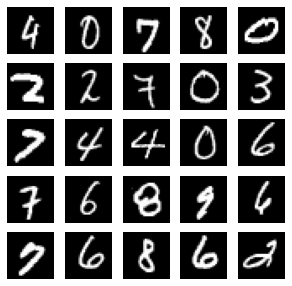

In [6]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
 plt.subplot(5, 5, i + 1)
 image = images[i]
 plt.imshow(image, cmap='gray')
 plt.axis('off')
plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

In [9]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

In [10]:
# load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [11]:
# compute the number of labels
num_labels = len(np.unique(y_train))

In [12]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size

In [14]:
# resize and normalize
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [27]:
print(np.shape(x_train))

(60000, 784)


In [15]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [25]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
# plot_model(model, to_file='mlp-mnist.png', show_shapes=True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_21 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)               

In [26]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
 optimizer='adam',
 metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

Epoch 1/20
469/469 [==============================] - 1s 2ms/step - loss: 0.4252 - accuracy: 0.8687
Epoch 2/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1965 - accuracy: 0.9409
Epoch 3/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1547 - accuracy: 0.9539
Epoch 4/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1314 - accuracy: 0.9600
Epoch 5/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9652
Epoch 6/20
469/469 [==============================] - 1s 2ms/step - loss: 0.1061 - accuracy: 0.9679
Epoch 7/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0976 - accuracy: 0.9689
Epoch 8/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9724
Epoch 9/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0822 - accuracy: 0.9742
Epoch 10/20
469/469 [==============================] - 1s 2ms/step - loss: 0.0785 - accuracy: 0.9749